## 서울시 자치구 서대문구에서 치킨집이 가장 많은 동은 어디인가?

### 자료 출처
- 데이터 다운로드 : LOCALDATA 웹사이트
- https://www.localdata.kr/
- 지방자치단체에서 인/허가한 업종별 데이터 제고
- 문화, 체육, 관광, 식품 등 11가지 분야에 대한 데이터 제공
- 회원 가입 절차를 별도로 거치지 않고도 공공데이터 다운로드

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 서울특별시_일반음식점.csv 사용
# data = pd.read_csv('./data/서울특별시_일반음식점.csv')
# UnicodeDecodeError - 인코딩에러: 한글이라는 글자의 문제
# 'utf-8' codec can't decode byte 0xb9 in position 1: invalid start byte
# 안코딩 방식의 변경이 필요하다.

In [6]:
data = pd.read_csv('./data/서울특별시_일반음식점.csv', 
                  encoding = 'cp949',
                  low_memory = False)

In [7]:
# data 확인
# head(위에서부터 보고 싶은 자료의 갯수)
# tail(밑에서부터 보고 싶은 자료의 갯수)
data.head(2)
data.tail(2)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,75.60,NaN,NaN,NaN,NaN
472914,472915,일반음식점,07_24_04_P,3130000,3130000-101-2020-01013,20201208,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,22.75,NaN,NaN,NaN,NaN


In [9]:
# 데이터 개요(일반 정보) 확안
# int - 수치, object - 문자형
# 결측은 제거하거나 채워줘야함 -> 전처리 작업
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

In [15]:
### 각 인/허가된 점포가 취급하는 품목이 무엇인지 -> 음식점 + 치킨집과 관련된 항복이 필요하다. (위생업태명, 업태구분)
### 현재 영업중(영업상태)
### 주소가 서대문구인지? (도로명 전체주소/소재지 전체주소)

In [10]:
### 취급 품목
data.위생업태명 # 상세구분
data.업태구분명 # 위생업태명의 상위구분

0         한식
1         한식
2         한식
3         한식
4         일식
          ..
472910    한식
472911    한식
472912    기타
472913    한식
472914    기타
Name: 업태구분명, Length: 472915, dtype: object

In [11]:
# 현재 data의 위생업태 종류 확인 - 종복을 제거 한 후 한번씩만 표현
# 파이썬 자료 구조 중 set : 중복을 허가하지 않는 집합자료형
# 보통 중복 제거 후 data 확인 시 많이 사용
set(data.위생업태명.values)
# 치킨집에 해당하는 data만 뽑아 쓰기  '통닭(치킨)' 두 단어 중 하나늘 포함안 위생 업태명의 데이터만을 사용

{nan,
 '간이주점',
 '감성주점',
 '경양식',
 '기타',
 '기타 휴게음식점',
 '김밥(도시락)',
 '까페',
 '냉면집',
 '다방',
 '라이브카페',
 '룸살롱',
 '복어취급',
 '분식',
 '뷔페식',
 '식육(숯불구이)',
 '식품등 수입판매업',
 '식품소분업',
 '외국음식전문점(인도,태국등)',
 '이동조리',
 '일반조리판매',
 '일식',
 '전통찻집',
 '정종/대포집/소주방',
 '제과점영업',
 '중국식',
 '출장조리',
 '커피숍',
 '키즈카페',
 '탕류(보신용)',
 '통닭(치킨)',
 '패밀리레스트랑',
 '패스트푸드',
 '한식',
 '호프/통닭',
 '횟집'}

In [12]:
# 위생업태명에 통닭이나 치킨 문자열이 포함되어 있는지 확인
# 문자열.contains(확인하려는 문자열1): 문자열 안에 문자열1이 포함되어 있는지의 여부를 확인
data.위생업태명.str.contains('통닭|치킨', na = False)

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Name: 위생업태명, Length: 472915, dtype: bool

In [13]:
# 조건 인덱싱을 사용 : 위생업태명 중 통닭/치킨이 포함된 업태명을 반환
data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na = False)]
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na = False)])
# 위생 업태명이 {'통닭(치킨)', '호프/통닭'} 인 업장 data 가 필요하다.

{'통닭(치킨)', '호프/통닭'}

In [14]:
# 현재 영업중인 업장
# '영업/정상' 인 경우인 data 가 필요하다.
set(data.영업상태명)

{'영업/정상', '폐업'}

In [15]:
# 영업 상태명이 영업/정상 이고 위생업태명이 '통닭(치킨)', '호프/통닭' 인 업장 data 추출한다.

In [35]:
# 위 조건을 만족하는 조건식 생성
# 시리즈.isin([데이터1, 데이터2, ......]) 을 활용
# 시리즈 원소가 집합형자료(list 등)의 적오도 원소 1개와 일치하면 True를 반환해주는 함수
# (data.영업상태명 == '영업/정상') & (data.위생업태명.isin(['통닭(치킨)', '호프/통닭'])

In [17]:
# data_fin : 서울시에서 현재 영업 중인 치킨집 정보가 저장된 변수

data_fin = data[(data.영업상태명 == '영업/정상') & (data.위생업태명.isin(['통닭(치킨)', '호프/통닭']))]

In [18]:
data_fin.info()
# 서울시 전체 자치구의 현재 영업중인 치킨집의 수는 13110 개이다.
# 이제 서대문구에 해당하는 치킨집의 정보만을 추출하면 된다.

<class 'pandas.core.frame.DataFrame'>
Index: 13110 entries, 30 to 124203
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           13110 non-null  int64  
 1   개방서비스명       13110 non-null  object 
 2   개방서비스아이디     13110 non-null  object 
 3   개방자치단체코드     13110 non-null  int64  
 4   관리번호         13110 non-null  object 
 5   인허가일자        13110 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     13110 non-null  int64  
 8   영업상태명        13110 non-null  object 
 9   상세영업상태코드     13110 non-null  int64  
 10  상세영업상태명      13110 non-null  object 
 11  폐업일자         0 non-null      float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        6536 non-null   object 
 16  소재지면적        12677 non-null  object 
 17  소재지우편번호      13103 non-null  float64
 18  소재지전체주소      13103 non-null  object 
 19  도로명전체주소

In [19]:
# 서대문구 데이터만 필요
data_fin = data_fin[['소재지전체주소','위생업태명']]
data_fin.head()

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [20]:
# 위생업태명 유효성 검사
set(data_fin.위생업태명)

{'통닭(치킨)', '호프/통닭'}

In [21]:
# 주소컬럼 이용 서대문구 data만 추출
# 주소에 서대문구 문자열이 포함된 행만 추출
res = data_fin.소재지전체주소.str.contains('서대문구', na = False)
data_seo = data_fin[res]
data_seo.head()

,소재지전체주소,위생업태명
178,서울특별시 서대문구 창천동 33-25번지,통닭(치킨)
698,서울특별시 서대문구 홍제동 459 현대종합상가,호프/통닭
724,서울특별시 서대문구 남가좌동 347-20번지,호프/통닭
1200,서울특별시 서대문구 연희동 131-1번지 사러가쇼핑,호프/통닭
1405,서울특별시 서대문구 창천동 52-14,호프/통닭


In [22]:
# data_seo df 는 서대문구 치킨집의 주소 정보를 갖고 있는 df
data_seo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 178 to 124130
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지전체주소  400 non-null    object
 1   위생업태명    400 non-null    object
dtypes: object(2)
memory usage: 9.4+ KB


### 서대문구 각 동의 치킨집 수를 연산
- 동 정보는 주소에 있음(주소는 규칙이 있음)
    - 앞 5글자 : 광역시도
    - 공백
    - 4글자 : 자치구
    - 공백
    - 동이름
- 서대문구 주소는 11 글자를 skip 하면 동정보가 나온다.
- 동데이터는 5글자를 추출 후 불필요한 문자는 제거 후 사용(문자열 전처리)
- 주소 문자열의 11번 index ~ 16번 index 위치까지 추춣
- 문자열 함수 중 slice(start = 시작 index, stop = 끝 index + 1)

In [23]:
addr = data_seo.소재지전체주소.str.slice(start = 11, stop = 17)
addr

178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

- addr : 서대문구 치킨집의 동정보
    - 동명 외에 더 많은 문자가 들어 있으므로 전처리
    - 숫자, 공백을 제거해줘야한다. -> 정규식을 활용
- 숫자 제거 : 정규식 활용
  - 정규식 : 일련의 약속된 연산기호를 이용해서 문자열 안에서 필요한 문자만 추출하는 연산식
  - 사용용도 : 형식문자 검증할 때 사용(email, url, 주민등록번호)

In [24]:
import re # 정규식 패키지
# re.sub(정규식, 대체문자, 원문자) : replace 와 같은 역할
# 한 개의 원소(문자열 1개)에 대해서만 작업을 한다
# 숫자를 의미하는 정규식 : [0-9]+ -> 0 ~ 9 사이의 문자가 1번이상 반복되는 패텀\
# 앞에 r을 붙여서 사용해야한다.
re.sub(r'[0-9]+', '', '창천동 52').replace(' ','')

'창천동'

In [25]:
# addr 변수에는 서대문구 치킨집 주소에서 동이름만 추출한 data가 저장
# 숫자와 공백이 포함되어 있는 data가 있기 떄문에 숫자와 공백을 제거
# 시리즈에 저장한다.
i = 0
addr_fin = pd.Series() # 빈 시리즈 생성
for string in addr:
    newstring = re.sub(r'[0-9]+','', string).replace(' ', '')
    addr_fin[i] = newstring
    i += 1

In [26]:
# 숫자와 공백이 제거된 서대문구 동 data
# 서대문구의 치킨집의 주소 중 동명만 추출한 값을 저장한 변수

In [27]:
addr_fin

0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
395    남가좌동
396     홍제동
397     홍제동
398    북아현동
399    남가좌동
Length: 400, dtype: object

In [28]:
# 서대문구 각 동에 치킨집이 몇 개나 있는지를 확인
# pd.series.value_counts()

In [29]:
addr_fin.value_counts()

창천동     87
홍제동     48
북가좌동    48
남가좌동    47
연희동     40
홍은동     34
충정로가    21
북아현동    20
대현동     15
냉천동     10
홍은동-     9
미근동      6
창천동-     4
옥천동      2
영천동      2
천연동      2
옥천동번     1
대신동      1
합동       1
합동-      1
연희동-     1
Name: count, dtype: int64

In [30]:
addr_fin =  addr_fin.str.replace('-', '').str.replace('옥천동번', '옥천동')

In [31]:
ck_cnt = addr_fin.value_counts()
ck_cnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: count, dtype: int64

### tree map 그래프를 활용한 시각화
- heatmap 과 바슷한 그래프 : haetmap 이  data의 크기를 색상으로 규정하는 데 반해ㅑ
- treemap은 사각형 내부 조각의 크기를 아용해서 data를 표현
- python treeamp : squarifty 패키지 사용

In [32]:
import squarify # 트리맵 작도 패키지

- squarify.plot(데이터, label =  표시할 라벨 data)

In [33]:
ck_cnt.values
ck_cnt.index

Index(['창천동', '홍제동', '북가좌동', '남가좌동', '홍은동', '연희동', '충정로가', '북아현동', '대현동',
       '냉천동', '미근동', '옥천동', '영천동', '합동', '천연동', '대신동'],
      dtype='object')

<Axes: >

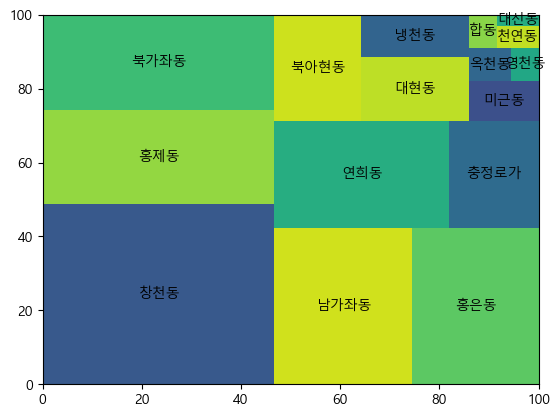

In [34]:
squarify.plot(ck_cnt, label = ck_cnt.index)

### 연습
- 정상영업/폐업 상관없이 현 시점(파일기준) 치킨집의 인허가 분포도(25개 자치구별)
    - 동x
- 영업상태가 폐업인 업장의 자치구별 분포도(업종 일반음식점인 업장)
    - 폐업이 얼마나 되는지
- 강남구의 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각에 대해 시각화)
    - 치킨집 -> 중국집
    - 서대문구 -> 강남구 